# Modelling of Tweets Classification

### This is the notebook for lyrics classification using BERT.

* Author: Alperen Demirci, Bora Dere

# Modelling of Tweets Classification

### This is the notebook for lyrics classification using BERT.

* Author: Alperen Demirci, Bora Dere

In [1]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [2]:
train_data = pandas.read_csv('mental-bert_features_train.csv')
test_data = pandas.read_csv('mental-bert_features_test.csv')

In [10]:
test_data.dropna(inplace=True)


In [11]:
train_data

,0,1,2,3,4,5,6,7,8,9,...,759,760,761,762,763,764,765,766,767,label
0,-0.026678,0.139190,0.989349,0.171072,0.277821,0.158469,0.243302,0.319971,-0.784452,-0.113344,...,-0.210343,-0.317362,-0.003326,0.029471,0.364599,0.244986,-0.168557,0.151234,0.211993,4
1,-0.145625,0.186253,0.191809,-0.043545,0.021858,0.225828,-0.105105,0.355803,-0.439315,0.236193,...,0.326505,-0.095661,0.168744,0.096359,0.189329,-0.392144,-0.115714,0.370022,0.381314,3
2,-0.377800,0.511390,0.469339,0.093074,-0.563070,0.886744,0.802717,1.008587,-0.509177,0.006262,...,0.154355,-0.333183,0.205315,0.067742,0.180224,0.085990,-0.125484,0.174690,0.363089,4
3,-0.501683,-0.229298,-0.199847,-0.339024,-0.500309,-0.291666,0.169971,-0.101046,-0.469766,-0.199436,...,0.000842,-0.329145,-0.458701,0.059457,-0.310086,0.594806,0.101222,-0.526250,-0.279527,3
4,-0.235193,0.128266,0.494645,-0.017637,-0.230010,0.139524,0.213247,0.095322,-0.527985,-0.192282,...,0.052195,-0.086811,0.029990,0.051900,0.492469,-0.016160,-0.122778,0.104219,0.058102,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47995,-0.007805,0.170073,0.362974,-0.046237,-0.115133,0.259642,0.579521,0.182581,-0.215153,-0.300190,...,-0.122324,-0.082850,-0.024814,0.005025,0.262414,-0.373233,-0.171136,-0.151085,-0.010710,3
47996,-0.153465,-0.047695,0.414778,-0.140385,-0.465876,0.816286,0.514170,0.125038,-1.245278,0.436748,...,0.023811,-0.754419,0.085264,-0.088973,0.181596,-0.227369,0.088096,0.001501,0.244796,4
47997,-0.175103,0.303949,0.264860,-0.031723,-0.158452,0.439888,-0.063316,0.515418,-0.585922,0.135068,...,0.038341,-0.123410,-0.038119,0.420190,0.122058,0.244832,0.256231,0.560740,0.535706,4
47998,-0.446105,-0.180992,0.050585,0.049773,0.036372,-0.021701,0.173670,-0.097602,-0.236872,0.229839,...,-0.099239,-0.071853,0.131961,-0.556366,0.373771,-0.101812,-0.441239,0.527225,-0.052928,3


In [12]:
xgb_model = xgb.XGBClassifier(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1, use_label_encoder=False)

xgb_model.fit(train_data.drop(columns=['label']), train_data['label'])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [13]:
# Predict the labels of the test set

predictions = xgb_model.predict(test_data.drop(columns=['label']))

# Calculate the accuracy of the model

accuracy = np.sum(predictions == test_data['label']) / len(test_data['label'])

print(f'Accuracy: {accuracy}')

Accuracy: 0.19894982497082847


In [14]:
test_data.label.isna().sum()

0

In [15]:
from sklearn.metrics import classification_report

print(classification_report(test_data['label'], predictions))



              precision    recall  f1-score   support

         0.0       0.18      0.21      0.20      1999
         1.0       0.19      0.14      0.16      2000
         2.0       0.22      0.15      0.18      1999
         3.0       0.21      0.30      0.24      2000
         4.0       0.19      0.23      0.21      2000
         5.0       0.21      0.16      0.19      2000

    accuracy                           0.20     11998
   macro avg       0.20      0.20      0.20     11998
weighted avg       0.20      0.20      0.20     11998



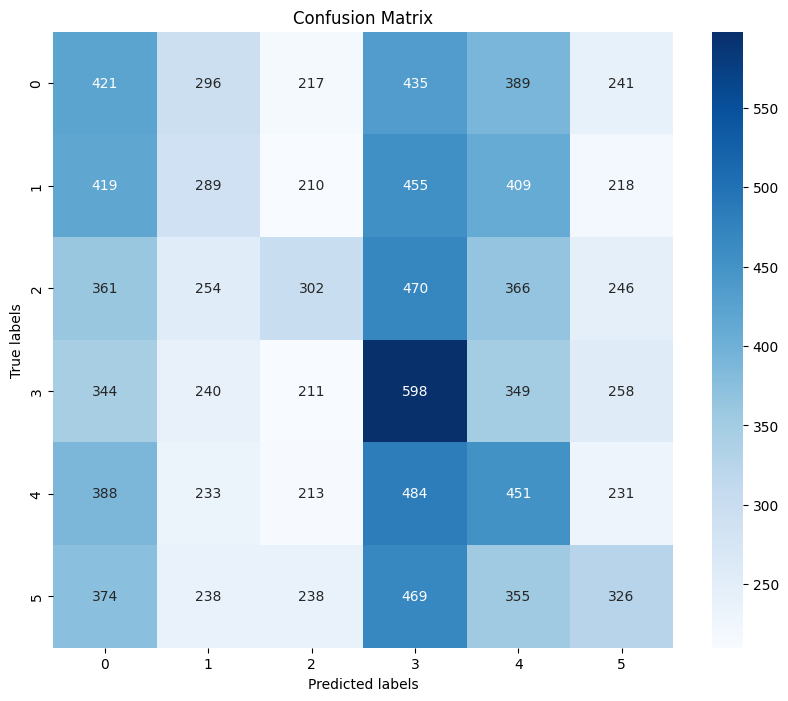

In [16]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_data['label'], predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

# Naive Bayes

In [17]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(train_data.drop(columns=['label']), train_data['label'])

predictions = nb_model.predict(test_data.drop(columns=['label']))

accuracy = np.sum(predictions == test_data['label']) / len(test_data['label'])

print(f'Accuracy: {accuracy}')

Accuracy: 0.1874479079846641


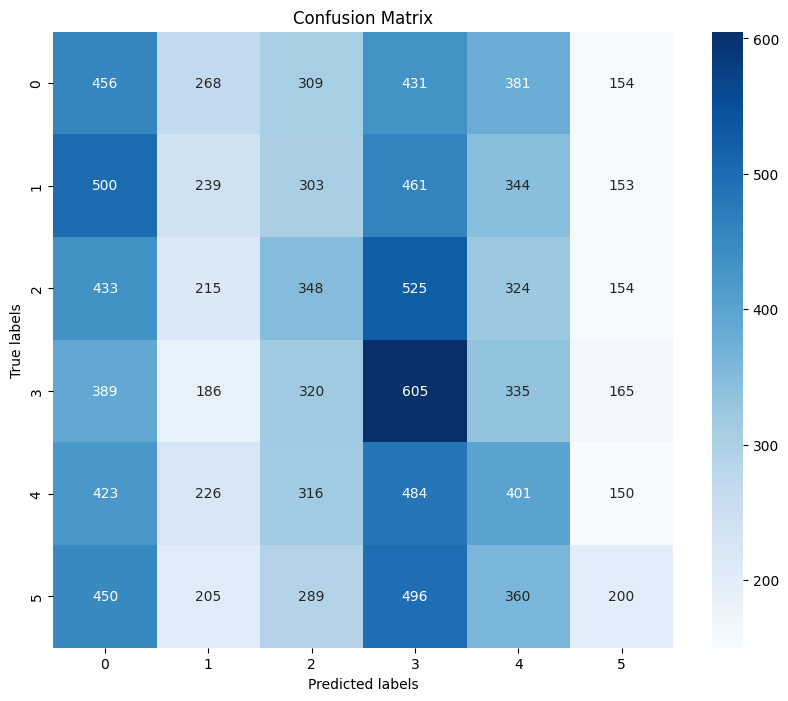

In [18]:
classification_report(test_data['label'], predictions)

conf_matrix = confusion_matrix(test_data['label'], predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')

plt.title('Confusion Matrix')

plt.show()


In [19]:
print(classification_report(test_data['label'], predictions))

              precision    recall  f1-score   support

         0.0       0.17      0.23      0.20      1999
         1.0       0.18      0.12      0.14      2000
         2.0       0.18      0.17      0.18      1999
         3.0       0.20      0.30      0.24      2000
         4.0       0.19      0.20      0.19      2000
         5.0       0.20      0.10      0.13      2000

    accuracy                           0.19     11998
   macro avg       0.19      0.19      0.18     11998
weighted avg       0.19      0.19      0.18     11998



# Random Forest

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

rf_model.fit(train_data.drop(columns=['label']), train_data['label'])

predictions = rf_model.predict(test_data.drop(columns=['label']))

accuracy = np.sum(predictions == test_data['label']) / len(test_data['label'])

print(f'Accuracy: {accuracy}')

Accuracy: 0.19278213035505917


In [21]:
print(classification_report(test_data['label'], predictions))

              precision    recall  f1-score   support

         0.0       0.18      0.20      0.19      1999
         1.0       0.18      0.19      0.18      2000
         2.0       0.19      0.19      0.19      1999
         3.0       0.20      0.23      0.22      2000
         4.0       0.20      0.18      0.19      2000
         5.0       0.20      0.17      0.18      2000

    accuracy                           0.19     11998
   macro avg       0.19      0.19      0.19     11998
weighted avg       0.19      0.19      0.19     11998



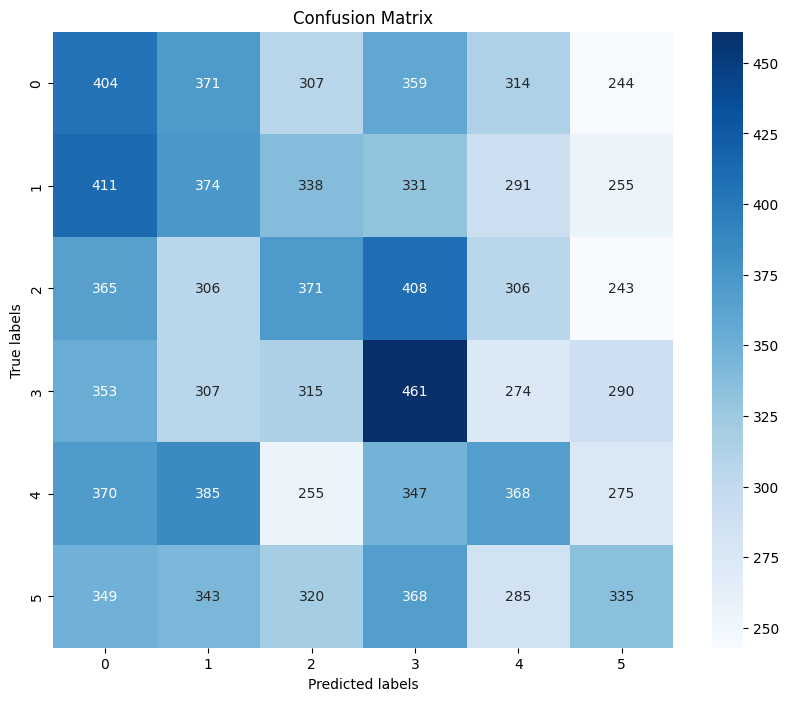

In [22]:
conf_matrix = confusion_matrix(test_data['label'], predictions)

plt.figure(figsize=(10, 8))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

# NN

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_model = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100, 50), activation='relu')

mlp_model.fit(train_data.drop(columns=['label']), train_data['label'])


predictions = mlp_model.predict(test_data.drop(columns=['label']))

accuracy = np.sum(predictions == test_data['label']) / len(test_data['label'])

print(f'Accuracy: {accuracy}')


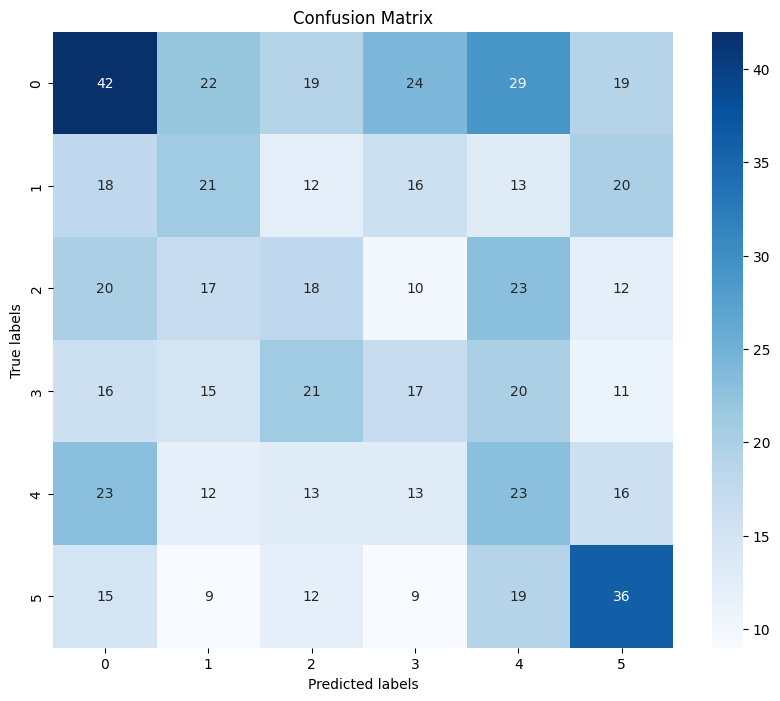

              precision    recall  f1-score   support

           0       0.31      0.27      0.29       155
           1       0.22      0.21      0.21       100
           2       0.19      0.18      0.18       100
           3       0.19      0.17      0.18       100
           4       0.18      0.23      0.20       100
           5       0.32      0.36      0.34       100

    accuracy                           0.24       655
   macro avg       0.23      0.24      0.23       655
weighted avg       0.24      0.24      0.24       655



In [23]:
classification_report(test_data['label'], predictions)

conf_matrix = confusion_matrix(test_data['label'], predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')

plt.xlabel('Predicted labels')

plt.ylabel('True labels')

plt.title('Confusion Matrix')

plt.show()

print(classification_report(test_data['label'], predictions))